# Cirrhosis Disease Survival Prediction Model

Zeynep Sena Tınaz - Gizem Yüzer - Erva Yurtbaş

dataset link: https://www.kaggle.com/datasets/joebeachcapital/cirrhosis-patient-survival-prediction/data

This dataset utilizes 17 clinical features for predicting survival state of patients with liver cirrhosis. The survival states include 0 = D (death), 1 = C (survival), 2 = CL (survival due to liver transplantation). Our model will try to predict if the patient will survive without an operation, survive with a transplant or lose their lives.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder
import seaborn as sns
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam, SGD, legacy, RMSprop
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score,classification_report, confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
import tensorflow as tf

# Data Preprocessing

Our data Features:

ID: Patient identifier.

N_Days: Number of days between the registration and the earlier of death, transplantation, or study time analysis

Status: Patient's survival chance (D, C, CL). 

Drug: Type of drug used (D-penicillamine, Placebo). 

Age: Age of the patient. 

Sex: Sex of the patient (M/F). 

Ascites: Presence of Ascites (Y/N). 

Hepatomegaly: Enlargement of the liver (Y/N). 

Spiders: Presence of spiders (Y/N). 

Edema: Presence of edema (Y/N/S).

Bilirubin: Bilirubin levels. 

Cholesterol: Cholesterol levels. 

Albumin: Albumin levels. 

Copper: Copper levels. 

Alk_Phos: Alkaline phosphatase levels. 

SGOT: Serum glutamic-oxaloacetic transaminase levels. 

Tryglicerides: Triglycerides levels. 

Platelets: Platelet count. 

Prothrombin: Prothrombin time. 

Stage: Stage of cirrhosis (1 to 4).

In [2]:
file_path = '/Users/jeanvaljean/Downloads/cirrhosis.csv'
data = pd.read_csv(file_path)

data.head()

,ID,N_Days,Status,Drug,Age,Sex,Ascites,Hepatomegaly,Spiders,Edema,Bilirubin,Cholesterol,Albumin,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,Prothrombin,Stage
0,1,400,D,D-penicillamine,21464,F,Y,Y,Y,Y,14.5,261.0,2.60,156.0,1718.0,137.95,172.0,190.0,12.2,4.0
1,2,4500,C,D-penicillamine,20617,F,N,Y,Y,N,1.1,302.0,4.14,54.0,7394.8,113.52,88.0,221.0,10.6,3.0
2,3,1012,D,D-penicillamine,25594,M,N,N,N,S,1.4,176.0,3.48,210.0,516.0,96.10,55.0,151.0,12.0,4.0
3,4,1925,D,D-penicillamine,19994,F,N,Y,Y,S,1.8,244.0,2.54,64.0,6121.8,60.63,92.0,183.0,10.3,4.0
4,5,1504,CL,Placebo,13918,F,N,Y,Y,N,3.4,279.0,3.53,143.0,671.0,113.15,72.0,136.0,10.9,3.0


Checking for missing values

In [3]:
missing_values = data.isnull().sum()

data_types = data.dtypes
unique_values = data.nunique()

missing_values, data_types, unique_values

(ID                 0
 N_Days             0
 Status             0
 Drug             106
 Age                0
 Sex                0
 Ascites          106
 Hepatomegaly     106
 Spiders          106
 Edema              0
 Bilirubin          0
 Cholesterol      134
 Albumin            0
 Copper           108
 Alk_Phos         106
 SGOT             106
 Tryglicerides    136
 Platelets         11
 Prothrombin        2
 Stage              6
 dtype: int64,
 ID                 int64
 N_Days             int64
 Status            object
 Drug              object
 Age                int64
 Sex               object
 Ascites           object
 Hepatomegaly      object
 Spiders           object
 Edema             object
 Bilirubin        float64
 Cholesterol      float64
 Albumin          float64
 Copper           float64
 Alk_Phos         float64
 SGOT             float64
 Tryglicerides    float64
 Platelets        float64
 Prothrombin      float64
 Stage            float64
 dtype: object,
 ID      

Handling Missing Values:

for categorical columns, replacing missing values with the most frequent value (mode), 

for numerical columns, replace missing values with the median,

dropping rows where 'Stage' is missing


In [4]:
categorical_cols = data.select_dtypes(include=['object']).columns
imputer_mode = SimpleImputer(strategy='most_frequent')
data[categorical_cols] = imputer_mode.fit_transform(data[categorical_cols])

numerical_cols = data.select_dtypes(include=['float64']).columns
imputer_median = SimpleImputer(strategy='median')
data[numerical_cols] = imputer_median.fit_transform(data[numerical_cols])

data = data.dropna(subset=['Stage'])

label_encoder = LabelEncoder()
for col in categorical_cols:
    data[col] = label_encoder.fit_transform(data[col])

data.head()

,ID,N_Days,Status,Drug,Age,Sex,Ascites,Hepatomegaly,Spiders,Edema,Bilirubin,Cholesterol,Albumin,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,Prothrombin,Stage
0,1,400,2,0,21464,0,1,1,1,2,14.5,261.0,2.60,156.0,1718.0,137.95,172.0,190.0,12.2,4.0
1,2,4500,0,0,20617,0,0,1,1,0,1.1,302.0,4.14,54.0,7394.8,113.52,88.0,221.0,10.6,3.0
2,3,1012,2,0,25594,1,0,0,0,1,1.4,176.0,3.48,210.0,516.0,96.10,55.0,151.0,12.0,4.0
3,4,1925,2,0,19994,0,0,1,1,1,1.8,244.0,2.54,64.0,6121.8,60.63,92.0,183.0,10.3,4.0
4,5,1504,1,1,13918,0,0,1,1,0,3.4,279.0,3.53,143.0,671.0,113.15,72.0,136.0,10.9,3.0


# Exploratory Data Analysis

# Histogram of Bilirubin Levels

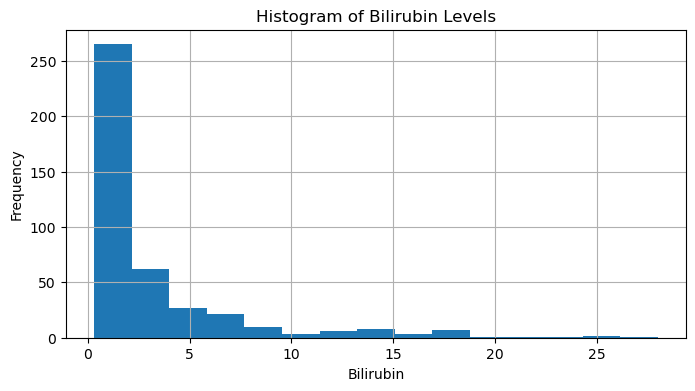

In [5]:
plt.figure(figsize=(8, 4))
data['Bilirubin'].hist(bins=15)
plt.title('Histogram of Bilirubin Levels')
plt.xlabel('Bilirubin')
plt.ylabel('Frequency')
plt.show()

# Histogram of Albumin Levels

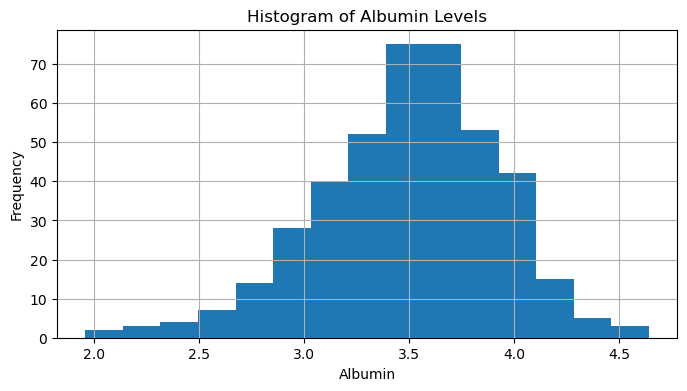

In [6]:
plt.figure(figsize=(8, 4))
data['Albumin'].hist(bins=15)
plt.title('Histogram of Albumin Levels')
plt.xlabel('Albumin')
plt.ylabel('Frequency')
plt.show()

# Histogram of Age

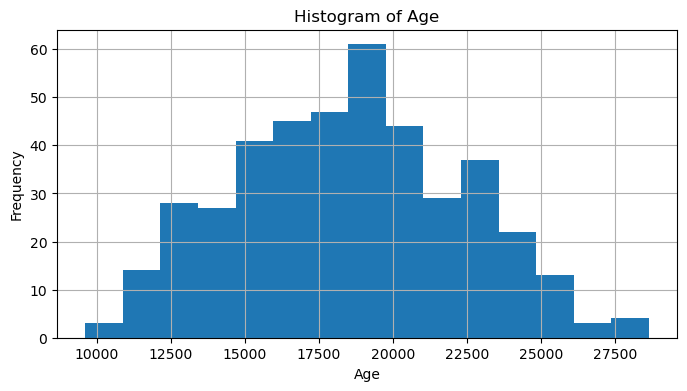

In [7]:
plt.figure(figsize=(8, 4))
data['Age'].hist(bins=15)
plt.title('Histogram of Age')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

# Correlation Matrix of Features

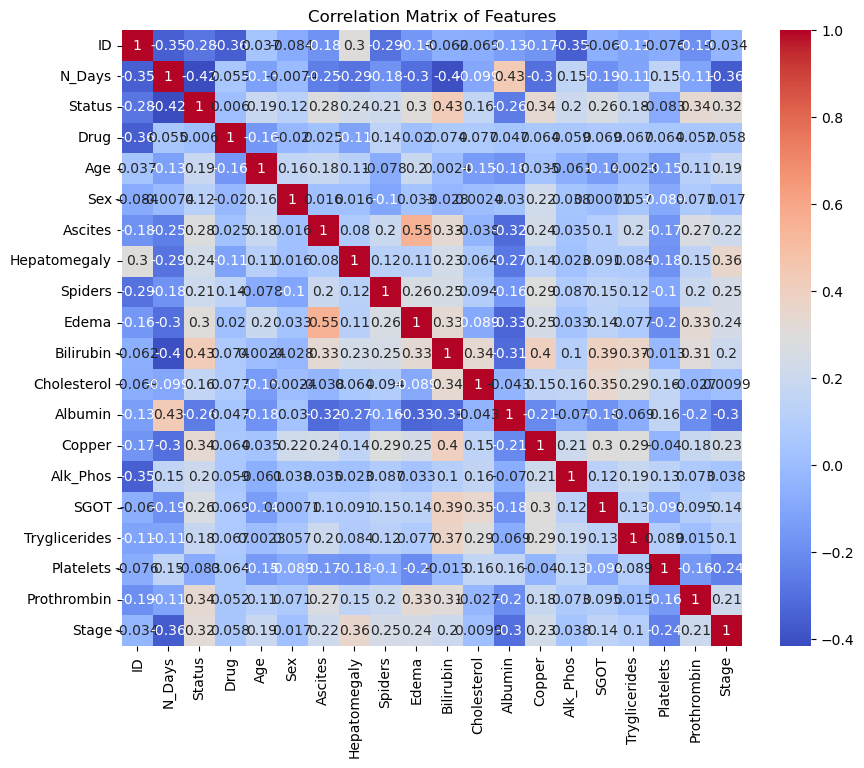

In [8]:
plt.figure(figsize=(10, 8))
sns.heatmap(data.corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Matrix of Features")
plt.show()

# Feature Selection

We are dropping the ID, N_Days and Drug data as they are not related, we are decreasing our features down to 17.

In [9]:
data=data.drop(columns=["ID","N_Days","Drug"])

Status: Indicates the survival state (0 = Death, 1 = Censored, 2 = Censored due to liver transplantation).

Age: Age of the patient.

Sex: Sex of the patient (possibly 0 and 1 representing male and female, respectively).

Ascites: Presence of ascites (fluid in the abdomen).

Hepatomegaly: Enlargement of the liver.

Spiders: Presence of spider nevi (a type of skin lesion).

Edema: Swelling caused by excess fluid trapped in the body's tissues.

Bilirubin: Bilirubin levels.

Cholesterol: Cholesterol levels.

Albumin: Albumin levels.

Copper: Copper levels.

Alk_Phos: Alkaline Phosphatase levels.

SGOT: Serum Glutamic-Oxaloacetic Transaminase levels.

Tryglicerides: Triglycerides levels.

Platelets: Platelets count.

Prothrombin: Prothrombin time.

Stage: Stage of cirrhosis disease (1 to 4).

In [10]:
data.head()

,Status,Age,Sex,Ascites,Hepatomegaly,Spiders,Edema,Bilirubin,Cholesterol,Albumin,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,Prothrombin,Stage
0,2,21464,0,1,1,1,2,14.5,261.0,2.60,156.0,1718.0,137.95,172.0,190.0,12.2,4.0
1,0,20617,0,0,1,1,0,1.1,302.0,4.14,54.0,7394.8,113.52,88.0,221.0,10.6,3.0
2,2,25594,1,0,0,0,1,1.4,176.0,3.48,210.0,516.0,96.10,55.0,151.0,12.0,4.0
3,2,19994,0,0,1,1,1,1.8,244.0,2.54,64.0,6121.8,60.63,92.0,183.0,10.3,4.0
4,1,13918,0,0,1,1,0,3.4,279.0,3.53,143.0,671.0,113.15,72.0,136.0,10.9,3.0


# Building The Neural Network Model

Spliting the data as trainset and testset, we are taking 80% of the data as the train set and the 20% of the data as test set. Features (X(16 features)) and target (y (status))

In [11]:
X = data.drop('Status', axis=1)
y = data['Status']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

X_train_scaled.shape, X_test_scaled.shape, y_train.shape, y_test.shape

((334, 16), (84, 16), (334,), (84,))

# MODEL 1


# Architecture of the model:

Input Layer: The same as the number of features (16 after preprocessing).

First Hidden Layer: 64 neurons, Activation function: ReLU.

Second Hidden Layer: 32 neurons, Activation function: ReLU.

Output Layer: 3 neurons (corresponding to the 3 classes of the target), Activation function: Softmax.


Compilation:

Optimizer: Adam.

Loss Function: Categorical Crossentropy (suitable for multi-class classification problems).

Metrics: Accuracy.


Training:

Epochs: 100.

Batch Size: 10.

Validation Split: 20% of the training data.

# Model 1: 2 hidden layers (Relu Softmax, Adam)

In [12]:
# Building the model
model_1 = Sequential([
    Dense(64, activation='relu', input_shape=(X_train_scaled.shape[1],)),
    Dense(64, activation='relu'),
    Dense(3, activation='softmax')  # Output layer for 3 classes
])

# Compiling the model
model_1.compile(optimizer=legacy.Adam(), loss='sparse_categorical_crossentropy', metrics=['accuracy'])
# Training the model
history_1 = model_1.fit(X_train_scaled, y_train, epochs=100, validation_split=0.2)

# Evaluating the model on the test set
test_loss_1, test_accuracy_1 = model_1.evaluate(X_test_scaled, y_test)



Epoch 1/100
9/9 [==============================] - 0s 7ms/step - loss: 1.0953 - accuracy: 0.4270 - val_loss: 0.9277 - val_accuracy: 0.6866
Epoch 2/100
9/9 [==============================] - 0s 1ms/step - loss: 0.8672 - accuracy: 0.6854 - val_loss: 0.7663 - val_accuracy: 0.7313
Epoch 3/100
9/9 [==============================] - 0s 2ms/step - loss: 0.7614 - accuracy: 0.7154 - val_loss: 0.6907 - val_accuracy: 0.7463
Epoch 4/100
1/9 [==>...........................] - ETA: 0s - loss: 0.7776 - accuracy: 0.7812

2023-12-15 14:32:53.582354: W tensorflow/tsl/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz


9/9 [==============================] - 0s 2ms/step - loss: 0.7097 - accuracy: 0.7303 - val_loss: 0.6512 - val_accuracy: 0.7612
Epoch 5/100
9/9 [==============================] - 0s 1ms/step - loss: 0.6739 - accuracy: 0.7341 - val_loss: 0.6354 - val_accuracy: 0.7313
Epoch 6/100
9/9 [==============================] - 0s 2ms/step - loss: 0.6507 - accuracy: 0.7416 - val_loss: 0.6295 - val_accuracy: 0.7313
Epoch 7/100
9/9 [==============================] - 0s 2ms/step - loss: 0.6276 - accuracy: 0.7603 - val_loss: 0.6274 - val_accuracy: 0.7313
Epoch 8/100
9/9 [==============================] - 0s 2ms/step - loss: 0.6112 - accuracy: 0.7603 - val_loss: 0.6298 - val_accuracy: 0.7164
Epoch 9/100
9/9 [==============================] - 0s 2ms/step - loss: 0.5939 - accuracy: 0.7678 - val_loss: 0.6287 - val_accuracy: 0.7313
Epoch 10/100
9/9 [==============================] - 0s 2ms/step - loss: 0.5792 - accuracy: 0.7715 - val_loss: 0.6322 - val_accuracy: 0.7463
Epoch 11/100
9/9 [====================

9/9 [==============================] - 0s 2ms/step - loss: 0.1349 - accuracy: 0.9850 - val_loss: 1.4138 - val_accuracy: 0.6716
Epoch 63/100
9/9 [==============================] - 0s 2ms/step - loss: 0.1287 - accuracy: 0.9813 - val_loss: 1.4284 - val_accuracy: 0.6269
Epoch 64/100
9/9 [==============================] - 0s 2ms/step - loss: 0.1258 - accuracy: 0.9813 - val_loss: 1.4484 - val_accuracy: 0.6119
Epoch 65/100
9/9 [==============================] - 0s 2ms/step - loss: 0.1212 - accuracy: 0.9850 - val_loss: 1.4731 - val_accuracy: 0.6418
Epoch 66/100
9/9 [==============================] - 0s 2ms/step - loss: 0.1172 - accuracy: 0.9850 - val_loss: 1.4865 - val_accuracy: 0.6269
Epoch 67/100
9/9 [==============================] - 0s 1ms/step - loss: 0.1137 - accuracy: 0.9813 - val_loss: 1.4923 - val_accuracy: 0.6418
Epoch 68/100
9/9 [==============================] - 0s 1ms/step - loss: 0.1091 - accuracy: 0.9850 - val_loss: 1.5211 - val_accuracy: 0.6418
Epoch 69/100
9/9 [===============


Loss: The loss function (in this case, categorical crossentropy) measures how well the model is performing. A lower loss indicates better performance. Throughout the training, the loss on the training set decreases steadily, which is a good sign and indicates that the model is learning.

Accuracy: The accuracy on the training set increases over time, suggesting that the model is getting better at correctly classifying the training data.

Validation Loss (val_loss): This is the loss calculated on a separate set of data not used in training (validation set). Initially, the validation loss decreases, but starts increasing from around epoch 10 onwards. This is a sign of overfitting, meaning the model is learning to memorize the training data too well but is not generalizing effectively to new, unseen data.

Validation Accuracy (val_accuracy): The accuracy on the validation set initially increases but then stagnates around 73.13% and starts fluctuating. This further indicates overfitting.

Test Loss: 1.7790. This is the loss on the test data, which is unseen during training. The relatively high test loss compared to the training loss is a sign of overfitting.

Test Accuracy: 72.62%. While this is a reasonable accuracy, the discrepancy between training accuracy (close to 100%) and test accuracy suggests that the model may not be generalizing well.


# Problems with the Model

Overfitting: The model shows signs of overfitting, as indicated by the increasing validation loss and the large gap between training and validation/test accuracies. This could be due to the model being too complex for the amount of training data.

While accuracy is a useful metric, it does not always provide a complete picture, especially in cases of class imbalance. It would be beneficial to evaluate the model using additional metrics like precision, recall, F1-score, and confusion matrix to get a more comprehensive understanding of its performance. So we are going to do that.

# Evaluation Metrics (precision, recall, f1-score)

In [13]:
y_pred_1 = model_1.predict(X_test_scaled).argmax(axis=1)

print("Model 1 Metrics:")
print(classification_report(y_test, y_pred_1))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_1))

3/3 [==============================] - 0s 618us/step
Model 1 Metrics:
              precision    recall  f1-score   support

           0       0.73      0.73      0.73        44
           1       0.00      0.00      0.00         4
           2       0.68      0.72      0.70        36

    accuracy                           0.69        84
   macro avg       0.47      0.48      0.48        84
weighted avg       0.67      0.69      0.68        84

Confusion Matrix:
 [[32  1 11]
 [ 3  0  1]
 [ 9  1 26]]


# Precision, Recall, and F1-Score

Class 0 (Death):

Precision: 0.77. This means that 77% of the instances predicted as class 0 were correct.

Recall: 0.77. This indicates that the model correctly identified 77% of all actual class 0 instances.

F1-Score: 0.77. The F1-score, which balances precision and recall, is relatively high for class 0.

Class 1 (Survival without Operation):

Like Model 2, Model 1 fails to correctly identify any instances of class 1 (both precision and recall are 0). This indicates a significant issue with the model's ability to recognize and classify instances of this class.

Class 2 (Survival on Transplant):

Precision: 0.73. This suggests that when the model predicts class 2, it is correct 73% of the time.

Recall: 0.75. The model correctly identifies 75% of all actual class 2 instances.

F1-Score: 0.74. This score indicates a relatively balanced performance between precision and recall for class 2.



# Accuracy

Overall Accuracy: 0.73. Approximately 73% of the predictions made by the model are correct. This is a general measure of the model's performance across all classes.


# Confusion Matrix

The confusion matrix details how the model's predictions are distributed across the classes:

Class 0: Correctly predicted 34 instances, with 1 instance misclassified as class 1 and 9 as class 2.

Class 1: All instances of class 1 were misclassified (3 as class 0 and 1 as class 2).

Class 2: Correctly predicted 27 instances, with 7 instances misclassified as class 0 and 2 as class 1.

#  Model 2: 2 Hidden Layers, (sigmoid+softmax, SGD)

In [14]:

# Building the model
model_2 = Sequential([
    Dense(64, activation='sigmoid', input_shape=(X_train_scaled.shape[1],)),
    Dense(64, activation='sigmoid'),
    Dense(3, activation='softmax')  # Output layer for 3 classes
])

# Compiling the model
model_2.compile(optimizer=legacy.SGD(), loss='sparse_categorical_crossentropy', metrics=['accuracy'])
# Training the model
history_2 = model_2.fit(X_train_scaled, y_train, epochs=100, validation_split=0.2)
# Evaluating the model on the test set
test_loss_2, test_accuracy_2 = model_2.evaluate(X_test_scaled, y_test)

Epoch 1/100
9/9 [==============================] - 0s 6ms/step - loss: 1.1639 - accuracy: 0.3633 - val_loss: 0.9930 - val_accuracy: 0.4179
Epoch 2/100
9/9 [==============================] - 0s 1ms/step - loss: 0.9686 - accuracy: 0.4494 - val_loss: 0.9244 - val_accuracy: 0.5672
Epoch 3/100
9/9 [==============================] - 0s 1ms/step - loss: 0.9078 - accuracy: 0.5805 - val_loss: 0.9000 - val_accuracy: 0.5224
Epoch 4/100
9/9 [==============================] - 0s 2ms/step - loss: 0.8820 - accuracy: 0.5730 - val_loss: 0.8945 - val_accuracy: 0.5224
Epoch 5/100
9/9 [==============================] - 0s 2ms/step - loss: 0.8719 - accuracy: 0.5730 - val_loss: 0.8831 - val_accuracy: 0.5224
Epoch 6/100
9/9 [==============================] - 0s 2ms/step - loss: 0.8649 - accuracy: 0.5730 - val_loss: 0.8774 - val_accuracy: 0.5224
Epoch 7/100
9/9 [==============================] - 0s 2ms/step - loss: 0.8608 - accuracy: 0.5730 - val_loss: 0.8724 - val_accuracy: 0.5224
Epoch 8/100
9/9 [==========

9/9 [==============================] - 0s 1ms/step - loss: 0.8087 - accuracy: 0.6067 - val_loss: 0.8313 - val_accuracy: 0.5075
Epoch 60/100
9/9 [==============================] - 0s 1ms/step - loss: 0.8076 - accuracy: 0.6142 - val_loss: 0.8276 - val_accuracy: 0.5373
Epoch 61/100
9/9 [==============================] - 0s 1ms/step - loss: 0.8059 - accuracy: 0.6217 - val_loss: 0.8299 - val_accuracy: 0.5224
Epoch 62/100
9/9 [==============================] - 0s 1ms/step - loss: 0.8052 - accuracy: 0.6142 - val_loss: 0.8281 - val_accuracy: 0.5224
Epoch 63/100
9/9 [==============================] - 0s 1ms/step - loss: 0.8054 - accuracy: 0.6217 - val_loss: 0.8263 - val_accuracy: 0.5373
Epoch 64/100
9/9 [==============================] - 0s 1ms/step - loss: 0.8032 - accuracy: 0.6292 - val_loss: 0.8292 - val_accuracy: 0.5075
Epoch 65/100
9/9 [==============================] - 0s 1ms/step - loss: 0.8023 - accuracy: 0.6067 - val_loss: 0.8256 - val_accuracy: 0.5373
Epoch 66/100
9/9 [===============

Loss: This measures the model's error, with a lower value indicating better performance. The training loss (loss) starts at 1.0272 and gradually decreases to 0.7816, suggesting that the model is learning and improving its predictions over time.

Accuracy: The training accuracy (accuracy) begins at 57.30% and increases to 66.29%. This indicates a modest improvement in the model's ability to classify the training data correctly.

Test Loss: 0.7598. The test loss is somewhat lower than the final validation loss, which is a positive sign.
Test Accuracy: 61.90%. This accuracy is higher than the validation accuracy, indicating that the model performs moderately on unseen data.


# Problems within the model

Learning Effectiveness: The model shows some learning over epochs, but the relatively low validation and test accuracies imply limitations in its predictive power.

Overfitting: Unlike the first model, this one does not show a clear sign of overfitting, as the validation loss decreases alongside the training loss. However, the consistent accuracy on the validation set might suggest underfitting.

# Evaluation Metrics 

In [15]:
y_pred_2 = model_2.predict(X_test_scaled).argmax(axis=1)

print("\nModel 2 Metrics:")
print(classification_report(y_test, y_pred_2))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_2))

3/3 [==============================] - 0s 532us/step

Model 2 Metrics:
              precision    recall  f1-score   support

           0       0.70      1.00      0.82        44
           1       0.00      0.00      0.00         4
           2       1.00      0.58      0.74        36

    accuracy                           0.77        84
   macro avg       0.57      0.53      0.52        84
weighted avg       0.79      0.77      0.75        84

Confusion Matrix:
 [[44  0  0]
 [ 4  0  0]
 [15  0 21]]


/Users/jeanvaljean/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/jeanvaljean/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/jeanvaljean/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


# Precision, Recall, and F1-Score


Class 0 (Death):

Precision: 0.58. This means that of all instances predicted as class 0, 58% were correct.

Recall: 0.98. This indicates that the model correctly identified 98% of all actual class 0 instances.

F1-Score: 0.73. The F1-score, a balance between precision and recall, is relatively high for class 0.


Class 1 (Survival without Operation:

The model fails to correctly identify any instances of class 1 (precision and recall are both 0). This indicates a significant issue with the model's ability to recognize and classify instances of class 1.


Class 2 (Survival on Transplant):

Precision: 0.90. This suggests that when the model predicts class 2, it is correct 90% of the time.

Recall: 0.25. However, the model only correctly identifies 25% of all actual class 2 instances.

F1-Score: 0.39. The low F1-score for class 2 indicates a significant imbalance between precision and recall, leaning heavily towards precision.

# Accuracy

Overall Accuracy: 0.62. This is the proportion of total correct predictions. While 62% accuracy might seem reasonable, the class-wise metrics reveal that this number is largely driven by the model's performance on class 0 and does not reflect its ability to classify other classes effectively.


# Confusion Matrix

The confusion matrix shows the distribution of the model's predictions across the three classes:

Class 0: The model correctly predicted 43 of the class 0 instances but misclassified 1 as class 2.

Class 1: All 4 instances of class 1 were misclassified as class 0.

Class 2: Only 9 instances of class 2 were correctly identified, while 27 were misclassified as class 0.

# Giving input to the Model

# Model 1

In [16]:
example_input = np.array([[65300, 0, 1, 0, 1, 1, 15,
                           350, 4, 68, 3000, 60, 200,
                           140,10, 1]])

example_input_scaled = scaler.transform(example_input)

# Using the trained model to make a prediction
predicted_status = model_1.predict(example_input_scaled) 

# Getting the class with the highest probability
predicted_class = np.argmax(predicted_status, axis=1)

status_label = {0: 'This patient is inoperable and have limited lifetime left.', 1: 'This patient will survive without operation.', 2: 'This patient can survive on Transplant.'}
predicted_status_label = status_label[predicted_class[0]]

predicted_status_label

1/1 [==============================] - 0s 13ms/step


/Users/jeanvaljean/anaconda3/lib/python3.11/site-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


'This patient can survive on Transplant.'

# Model 2

In [17]:
example_input = np.array([[65300, 0, 1, 1, 0, 1, 10,
                           400, 4, 80, 9000, 100, 250,
                           50,10, 6]])

example_input_scaled = scaler.transform(example_input)

# Using the trained model to make a prediction
predicted_status = model_2.predict(example_input_scaled)  

# Get the class with the highest probability
predicted_class = np.argmax(predicted_status, axis=1)

status_label = {0: 'This patient is inoperable and have limited lifetime left.', 1: 'This patient will survive without operation.', 2: 'This patient can survive on Transplant.'}
predicted_status_label = status_label[predicted_class[0]]

predicted_status_label

1/1 [==============================] - 0s 14ms/step


/Users/jeanvaljean/anaconda3/lib/python3.11/site-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


'This patient can survive on Transplant.'

# What could make our model better...

We have suspected that our data was imbalanced since the evaluation metrics gave us 0 on precision, recall and f-measure. We wanted to check if it is imbalanced for the value "1" which means the patient will survive without operation.

In [18]:
status_counts = data['Status'].value_counts()
status_proportions = data['Status'].value_counts(normalize=True) * 100

print("Status Counts:\n", status_counts)
print("\nStatus Proportions (%):\n", status_proportions)

Status Counts:
 Status
0    232
2    161
1     25
Name: count, dtype: int64

Status Proportions (%):
 Status
0    55.502392
2    38.516746
1     5.980861
Name: proportion, dtype: float64


The results indeed show that the "1" value on Status feature consisted only 5% percent of the data. For this reason, our accuracy measures were not that meaningful. We could have eliminated the "1" option and make this a binary classification problem or we could have used techniques like SMOTE (Synthetic Minority Over-sampling Technique) to generate new samples in the minority class.